Epoch 1/50
391/391 - 11s - loss: 4.1395 - accuracy: 0.0758 - val_loss: 3.8909 - val_accuracy: 0.1119 - 11s/epoch - 27ms/step
Epoch 2/50
391/391 - 9s - loss: 3.7514 - accuracy: 0.1337 - val_loss: 3.6753 - val_accuracy: 0.1537 - 9s/epoch - 24ms/step
Epoch 3/50
391/391 - 10s - loss: 3.5874 - accuracy: 0.1656 - val_loss: 3.5906 - val_accuracy: 0.1687 - 10s/epoch - 25ms/step
Epoch 4/50
391/391 - 10s - loss: 3.4669 - accuracy: 0.1862 - val_loss: 3.5023 - val_accuracy: 0.1831 - 10s/epoch - 24ms/step
Epoch 5/50
391/391 - 10s - loss: 3.3719 - accuracy: 0.2027 - val_loss: 3.4463 - val_accuracy: 0.1923 - 10s/epoch - 24ms/step
Epoch 6/50
391/391 - 10s - loss: 3.2832 - accuracy: 0.2180 - val_loss: 3.3691 - val_accuracy: 0.2067 - 10s/epoch - 24ms/step
Epoch 7/50
391/391 - 9s - loss: 3.2039 - accuracy: 0.2335 - val_loss: 3.3172 - val_accuracy: 0.2151 - 9s/epoch - 24ms/step
Epoch 8/50
391/391 - 8s - loss: 3.1365 - accuracy: 0.2473 - val_loss: 3.3025 - val_accuracy: 0.2160 - 8s/epoch - 20ms/step
Epoch 

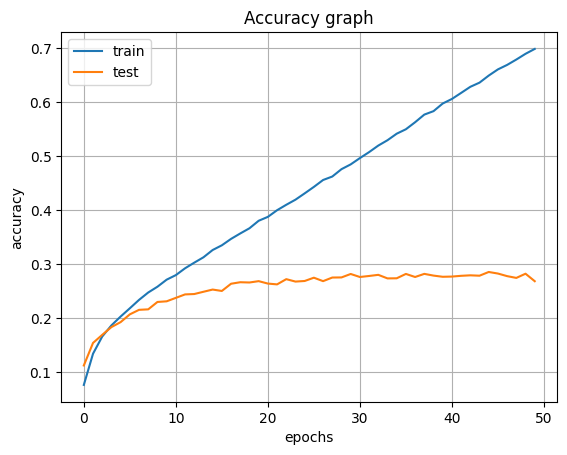

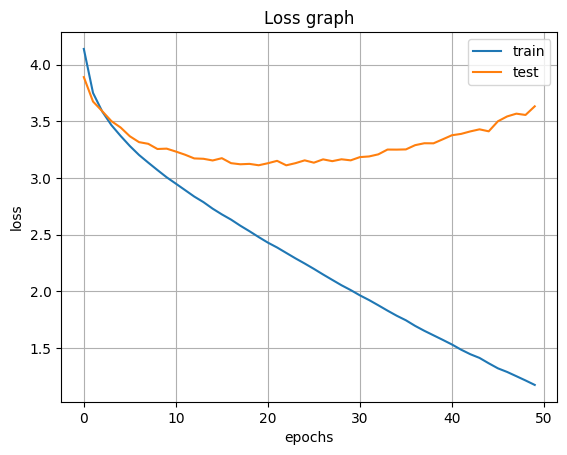

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar100.load_data()
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,100)
y_test=tf.keras.utils.to_categorical(y_test,100)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=100,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()